In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV files
users_df = pd.read_csv('/Users/johnharmer/Desktop/Springboard/Springboard_DataScience/relax_challenge/takehome_users.csv', encoding='ISO-8859-1')
engagement_df = pd.read_csv('/Users/johnharmer/Desktop/Springboard/Springboard_DataScience/relax_challenge/takehome_user_engagement.csv', encoding='ISO-8859-1')

# Display the first few rows of each dataframe to understand the data
users_df.head(), engagement_df.head()

(   object_id        creation_time               name  \
 0          1  2014-04-22 03:53:30     Clausen August   
 1          2  2013-11-15 03:45:04      Poole Matthew   
 2          3  2013-03-19 23:14:52  Bottrill Mitchell   
 3          4  2013-05-21 08:09:28    Clausen Nicklas   
 4          5  2013-01-17 10:14:20          Raw Grace   
 
                         email creation_source  last_session_creation_time  \
 0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
 1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
 2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
 3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
 4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   
 
    opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
 0                         1                           0      11   
 1                         0                      

In [3]:
# Convert time_stamp to datetime format
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

# Group by user_id and create a new column indicating unique login dates
engagement_df['login_date'] = engagement_df['time_stamp'].dt.date
user_logins = engagement_df.groupby('user_id')['login_date'].nunique().reset_index()

# Filter users with at least three unique login dates
adopted_users = user_logins[user_logins['login_date'] >= 3]['user_id']

# Add an "adopted_user" flag to users_df based on user_ids identified as adopted users
users_df['adopted_user'] = users_df['object_id'].isin(adopted_users).astype(int)

# Display the first few rows of the updated users dataframe
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


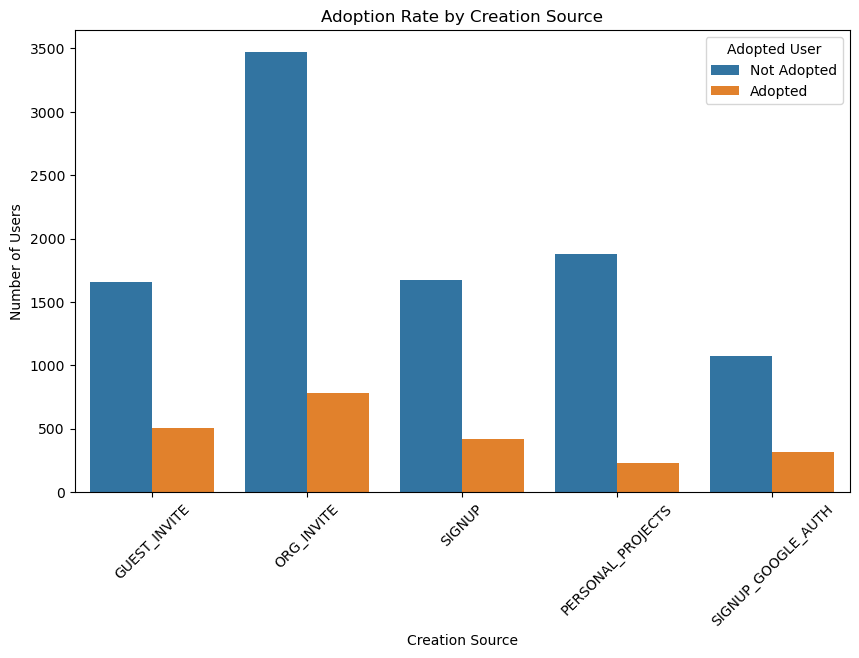

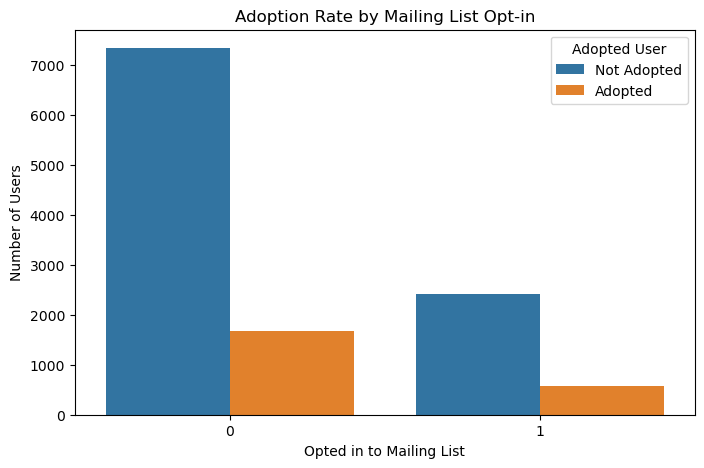

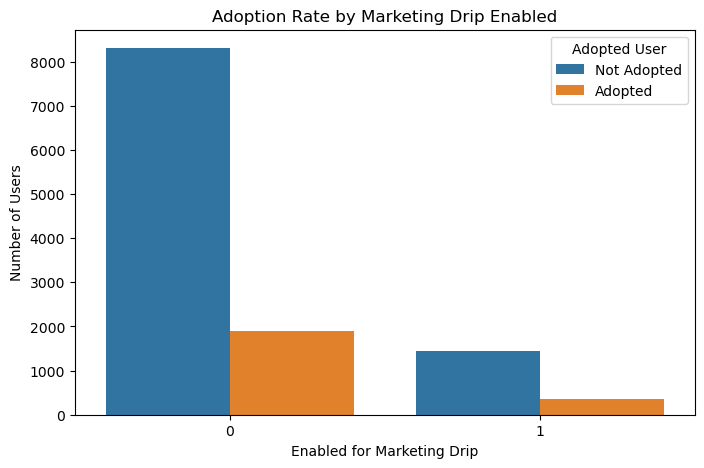

In [4]:
# Visualize the correlation between user attributes and adoption
# Plot adoption rates by creation_source
plt.figure(figsize=(10, 6))
sns.countplot(x='creation_source', hue='adopted_user', data=users_df)
plt.title('Adoption Rate by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Adopted User', labels=['Not Adopted', 'Adopted'])
plt.show()

# Plot adoption rates by opted_in_to_mailing_list
plt.figure(figsize=(8, 5))
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=users_df)
plt.title('Adoption Rate by Mailing List Opt-in')
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Number of Users')
plt.legend(title='Adopted User', labels=['Not Adopted', 'Adopted'])
plt.show()

# Plot adoption rates by enabled_for_marketing_drip
plt.figure(figsize=(8, 5))
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=users_df)
plt.title('Adoption Rate by Marketing Drip Enabled')
plt.xlabel('Enabled for Marketing Drip')
plt.ylabel('Number of Users')
plt.legend(title='Adopted User', labels=['Not Adopted', 'Adopted'])
plt.show()

**Creation Source:** The adoption rate appears to vary significantly depending on the account creation source. Users invited via ORG_INVITE and SIGNUP_GOOGLE_AUTH seem to have higher adoption rates compared to others.

**Mailing List Opt-in:** Users who opted into the mailing list appear to have slightly higher adoption rates, suggesting that engagement with promotional content might correlate with product adoption.

**Marketing Drip Enabled:** There doesn't seem to be a strong relationship between enabling marketing drip and user adoption, suggesting it might be less effective in driving product engagement.

<h2>User Adoption Analysis Summary</h2>

The goal of this analysis was to identify factors that predict user adoption, defined as logging in on three separate days within at least one seven-day period. The analysis utilized two datasets: a user table with information on 12,000 users and a usage summary table with daily user engagement data.

**Key Findings:**

**Creation Source:** The method by which a user created their account was a significant predictor of adoption. Users who were invited through an organization (ORG_INVITE) or signed up using Google authentication (SIGNUP_GOOGLE_AUTH) had higher adoption rates compared to other methods such as GUEST_INVITE or PERSONAL_PROJECTS. This suggests that users who join through organizations or use easy sign-up methods are more likely to become engaged users.

**Mailing List Opt-in:** Users who opted into receiving marketing emails showed a slightly higher likelihood of becoming adopted users. This indicates that being exposed to marketing materials might positively impact engagement, although the effect was not overwhelmingly strong.

**Marketing Drip:** Enabling marketing drip campaigns did not show a clear correlation with user adoption, suggesting that this factor may not be as effective in encouraging ongoing user engagement.

**Further Investigation:**

Additional analysis could focus on understanding engagement patterns by cohort, such as users grouped by sign-up month, to understand how adoption rates change over time.

It could also be beneficial to explore the impact of organization size (org_id) and network effects within the platform by investigating how user adoption rates are influenced by their inviter (invited_by_user_id).

Overall, the most promising indicators of user adoption are the creation source and mailing list opt-in status. Targeted onboarding efforts for users who sign up through SIGNUP or GUEST_INVITE might help improve adoption rates in these groups.

